In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

def create_dataset():
    group = np.array([
        [1.0, 2.0],
        [1.2, 0.1],
        [0.1, 1.4],
        [0.3, 3.5],
        [1.1, 1.0],
        [0.5, 1.5],
    ])
    labels = np.array(['A', 'A', 'B', 'B', 'A', 'B'])

    return group, labels

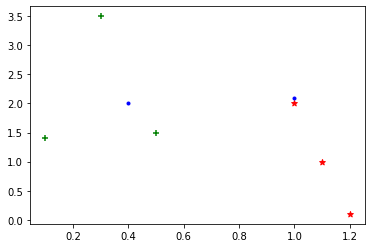

In [3]:
group, labels = create_dataset()

test_point = np.array([[1.0, 2.1], [0.4, 2.0]])

plt.scatter(group[labels == 'A', 0], group[labels == 'A', 1], color='r', marker='*')
plt.scatter(group[labels == 'B', 0], group[labels == 'B', 1], color='g', marker='+')
plt.scatter(test_point[:, 0], test_point[:, 1], color='b', marker='.')

plt.show()

In [11]:
def get_edistance(x1_list, x2): # 得到欧式距离
    return np.sqrt(np.sum(np.square(x1_list - x2), axis=1))

def get_mdistance(x1_list, x2): # 得到曼哈顿距离
    return np.sum(np.abs(x1_list - x2), axis=1)

def knn_classifier(k, distance, x_train, y_label, x_test):
    assert distance == 'E' or distance == 'M', 'distance must be E(欧氏距离) or M(曼哈顿距离)' 

    num_test = x_test.shape[0]
    label_list = []
    # 欧式距离

    for i in range(num_test):
        dis_list = get_edistance(x_train, x_test[i]) if distance == 'E' else get_mdistance(x_train, x_test[i])
        nearest_k = np.argsort(dis_list)[:k]
        class_dict = {}
        for i in nearest_k:
            class_dict[y_label[i]] = class_dict.get(y_label[i], 0) + 1

        sort_class_count = sorted(class_dict.items(), reverse=True)
        label_list.append(sort_class_count[0][0])
    
    return label_list
            


point, labels = create_dataset()
test_point = np.array([[1.0, 2.1], [0.4, 2.0]])
y_test_pred = knn_classifier(1, 'E', point, labels, test_point)
print(y_test_pred)


['A', 'B']
